### Tarea de Algoritmos de Optimizacion (93)

Leonardo Artiles Montero - C312

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import pandas as pd
from scipy.optimize import minimize, differential_evolution, basinhopping

 $f(\mathbf{x}) = \sum_{i=1}^{D} \left| x_i \right|^{i+1}$

In [2]:
def powell_sum(x):
    return sum(abs(x[i])**(i+2) for i in range(len(x)))

### **Propiedades de la Funcion Powell**

#### 1. **Continuidad**
La función Powell Sum es **continuamente diferenciable**. Esto implica que la función es suave y que existen derivadas continuas de todos los órdenes en el dominio. Esta característica es clave para que los métodos basados en el cálculo de gradientes, como el descenso por gradiente o el método de Newton, sean aplicables y efectivos en la búsqueda del mínimo.

#### 2. **Diferenciabilidad**
La función no solo es continua, sino también **diferenciable**, lo que permite que los algoritmos de optimización que requieren información de las derivadas, como BFGS (Broyden–Fletcher–Goldfarb–Shanno), sean viables. La existencia de derivadas continuas hace que la función sea apta para métodos cuasi-Newton y de gradiente conjugado.

#### 3. **Separable**
Una de las características más relevantes de la función Powell Sum es que es **separable**. Esto significa que puede descomponerse en una suma de términos, cada uno de los cuales depende de una sola variable. La separabilidad permite una simplificación de muchos métodos de optimización, facilitando su implementación en problemas de gran dimensionalidad.

#### 4. **Escalable**
La función Powell Sum es también **escalable**, lo que significa que se puede definir en cualquier número de dimensiones. Esta propiedad es valiosa para evaluar el rendimiento de los algoritmos de optimización cuando se trata de problemas de alta dimensionalidad. En este caso, el número de dimensiones (D) es un parámetro que puede variar libremente, y la complejidad del problema aumenta con el número de dimensiones.

#### 5. **Unimodal**
La función es **unimodal**, lo que implica que tiene un único mínimo global y no presenta mínimos locales. Esto es una propiedad ventajosa, ya que asegura que los algoritmos de optimización no se quedarán atrapados en mínimos locales, lo cual es un desafío común en muchos problemas de optimización multimodal. Cualquier algoritmo convergente que explore de forma adecuada el espacio de búsqueda debería ser capaz de encontrar el mínimo global.

#### 6. **Dominio y Rango**
El dominio de la función Powell Sum está restringido al intervalo  $(x_i \in [-1, 1])$  para cada variable $(x_i)$. Dentro de este intervalo, la función tiene un comportamiento bien definido y acotado, lo que facilita la aplicación de métodos de optimización basados en búsqueda directa o por gradiente. El rango de la función es no negativo, y su mínimo global ocurre en $(f(\mathbf{x}^*) = 0)$ cuando $( \mathbf{x}^* = \mathbf{0} )$.

#### 7. **Mínimo Global**
El mínimo global de la función ocurre cuando todas las variables son iguales a cero, es decir, $( x_i = 0 )$ para todas las $( i )$. En este punto, el valor de la función es $( f(\mathbf{x}^*) = 0 )$. La ubicación clara y única del mínimo global es una ventaja que permite validar el rendimiento de los algoritmos de optimización fácilmente.

#### 8. **Dificultad del Problema**
Aunque la función es relativamente sencilla (a mis amigos le tocaron unas que estaban en candela) en términos de su forma y comportamiento, su complejidad aumenta a medida que se incrementa el número de dimensiones. Esto la convierte en una herramienta útil para probar la eficiencia y robustez de los algoritmos en escenarios de alta dimensionalidad, donde los problemas de optimización pueden volverse considerablemente más difíciles de resolver en términos de tiempo computacional y precisión.

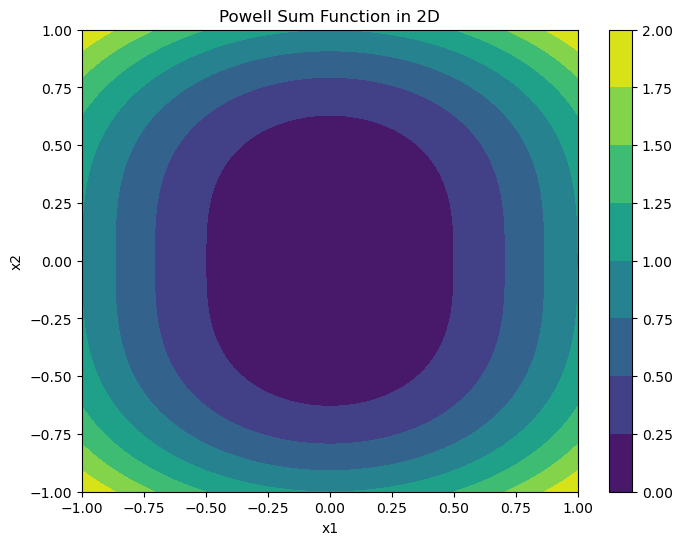

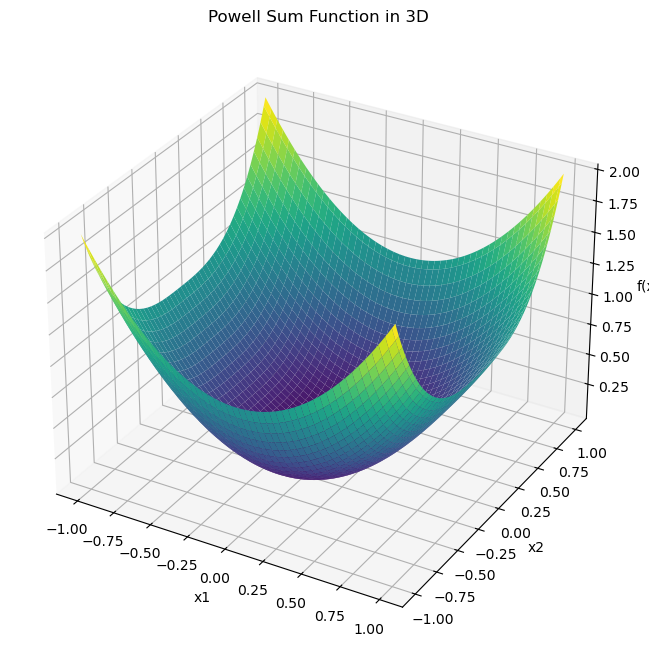

In [16]:
def plot_2d_powell_sum():
    x = np.linspace(-1, 1, 1000)
    y = np.linspace(-1, 1, 1000)
    X, Y = np.meshgrid(x, y)
    
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = powell_sum([X[i, j], Y[i, j]])
    
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar(cp)
    plt.title('Powell Sum Function in 2D')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

def plot_3d_powell_sum():
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = powell_sum([X[i, j], Y[i, j]])
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Powell Sum Function in 3D')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x)')
    plt.show()

plot_2d_powell_sum()
plot_3d_powell_sum()


### Algoritmos a comprobar:

#### 1. **Gradiente Descendente (BFGS)**

El **método BFGS** (Broyden–Fletcher–Goldfarb–Shanno) es un algoritmo de optimización cuasi-Newton que mejora el clásico método de descenso de gradiente mediante la aproximación de la matriz Hessiana inversa (segunda derivada de la función objetivo). El método BFGS se clasifica como un **algoritmo de optimización basada en gradientes**, lo que significa que utiliza información derivada (el gradiente) para determinar la dirección del descenso hacia el mínimo. (Ojo, note que este algoritmo no es el descenso del gradiente, aunque se pareza el nombre jajas)

En cada iteración, el algoritmo actualiza una aproximación de la matriz Hessiana inversa basada en las diferencias de gradientes evaluados en diferentes puntos. La ventaja de BFGS es que, sin calcular explícitamente la segunda derivada, se obtienen actualizaciones eficientes de la dirección de descenso, lo que hace que este método sea mucho más rápido y convergente en comparación con el descenso por gradiente simple.

**Pasos básicos del método BFGS:**
1. Inicialización de un punto de partida $(x_0)$ y una matriz identidad como aproximación inicial de la matriz Hessiana inversa.
2. Cálculo del gradiente en el punto actual.
3. Determinación de una dirección de descenso utilizando la matriz Hessiana aproximada.
4. Actualización de la posición del punto y de la matriz Hessiana inversa.
5. Repetición hasta que el gradiente sea lo suficientemente pequeño o se cumpla algún criterio de parada.

El método BFGS es particularmente efectivo para funciones suaves y diferenciables como la función Powell Sum.

#### 2. **Método Nelder-Mead (Simplex)**

El **método Nelder-Mead**, también conocido como el método del **simplex** (no confundir con el método simplex de programación lineal), es un algoritmo de optimización sin derivadas que busca el mínimo de una función multidimensional. Este método es especialmente útil cuando no se dispone de derivadas de la función objetivo, o cuando la función es ruidosa o no suave.

Nelder-Mead utiliza un poliedro (simplex) de $n+1$ vértices en un espacio de $n$ dimensiones, y en cada iteración modifica el simplex (expansión, contracción o reflexión) para explorar el espacio de búsqueda. En lugar de seguir un gradiente, el método evalúa la función objetivo en cada vértice del simplex y lo ajusta para desplazarse hacia el mínimo global.

**Pasos básicos del método Nelder-Mead:**
1. Inicialización de un simplex con $n+1$ vértices.
2. Evaluación de la función objetivo en cada vértice.
3. Clasificación de los vértices según los valores de la función.
4. Realización de operaciones geométricas como reflexión, expansión, o contracción para mejorar el simplex.
5. Repetición del proceso hasta que los vértices convergen en el mínimo.

El método Nelder-Mead es ampliamente utilizado por su simplicidad y eficacia, aunque puede ser menos robusto en problemas de alta dimensionalidad o funciones con muchos mínimos locales.

#### 3. **Método de Powell**

El **método de Powell** es un algoritmo de optimización sin derivadas que busca minimizar una función realizando movimientos sucesivos en direcciones conjugadas. A diferencia de otros algoritmos que requieren información del gradiente, el método de Powell encuentra direcciones conjuntas de forma adaptativa basándose en evaluaciones previas de la función.

El algoritmo utiliza una serie de direcciones iniciales ortogonales y, en cada iteración, realiza una búsqueda unidimensional en cada dirección. Después de realizar estos movimientos, el método calcula una nueva dirección conjugada, que es una combinación lineal de las direcciones anteriores, y repite el proceso.

**Pasos básicos del método Powell:**
1. Definir un conjunto inicial de direcciones ortogonales.
2. Realizar una búsqueda unidimensional en cada dirección.
3. Actualizar las direcciones conjugadas y definir una nueva dirección basada en los movimientos anteriores.
4. Repetir hasta que el cambio en la función objetivo sea pequeño.

Este método es eficiente en problemas diferenciables y puede converger más rápidamente que otros métodos basados en búsqueda directa.

#### 4. **Optimización Evolutiva: Differential Evolution**

El **algoritmo de evolución diferencial** es una técnica de optimización evolutiva que utiliza conceptos inspirados en la evolución biológica, como la mutación, recombinación y selección, para buscar el mínimo de una función objetivo. Es particularmente adecuado para problemas no lineales y multimodales.

En este método, una población de soluciones candidatas se modifica iterativamente a través de operaciones genéticas. En cada iteración, se seleccionan varios individuos de la población para generar una nueva solución mediante la combinación de estos. Si la nueva solución es mejor que la actual, reemplaza a la peor solución.

**Pasos básicos del algoritmo de Differential Evolution:**
1. Inicialización de una población de soluciones aleatorias.
2. Selección de soluciones padres para crear nuevas soluciones mediante recombinación y mutación.
3. Evaluación de las soluciones candidatas y selección de las mejores.
4. Repetición del proceso hasta que se alcanza el criterio de parada.

El algoritmo de **differential evolution** es robusto en la búsqueda global, pero puede ser más lento en la convergencia a una solución precisa en problemas unimodales.

#### 5. **Simulated Annealing (Basinhopping)**

El **recocido simulado** o **Simulated Annealing** es un algoritmo de optimización estocástica inspirado en el proceso físico de recocido de metales, donde un material se calienta y luego se enfría lentamente para minimizar su energía interna. En el contexto de optimización, el algoritmo permite "saltos" hacia soluciones potencialmente peores en las primeras etapas para escapar de mínimos locales, y a medida que avanza, disminuye la probabilidad de aceptar esas soluciones, permitiendo una búsqueda más precisa alrededor de los mínimos globales.

El algoritmo **basinhopping**, una extensión del recocido simulado, combina un método local de búsqueda, como BFGS, con saltos aleatorios controlados por un parámetro de temperatura, lo que facilita el escape de mínimos locales.

**Pasos básicos del Simulated Annealing:**
1. Inicialización de una solución aleatoria.
2. Perturbación aleatoria de la solución.
3. Evaluación de la nueva solución y aceptación o rechazo según una probabilidad basada en una función de temperatura.
4. Reducción gradual de la temperatura a lo largo de las iteraciones.
5. Repetición hasta alcanzar un criterio de convergencia.

Este método es útil en problemas multimodales y ruidosos, y es capaz de encontrar soluciones cercanas al óptimo global incluso cuando la función tiene muchos mínimos locales.


### Sobre la implementacion:

Todos estos algoritmos estan implementados en Scipy, por tanto no los implementare a mano, quizas luego implemente Adam (tengo curiosidad de hacerlo jajaja)

In [ ]:

def gradient_descent(dim):
    x0 = np.random.uniform(-1, 1, dim)
    result = minimize(powell_sum, x0, method='BFGS')
    return result.fun, result.success

def nelder_mead(dim):
    x0 = np.random.uniform(-1, 1, dim)
    result = minimize(powell_sum, x0, method='Nelder-Mead')
    return result.fun, result.success

def powell_method(dim):
    x0 = np.random.uniform(-1, 1, dim)
    result = minimize(powell_sum, x0, method='Powell')
    return result.fun, result.success

def differential_evol(dim):
    bounds = [(-1, 1) for _ in range(dim)]
    result = differential_evolution(powell_sum, bounds)
    return result.fun, result.success

def simulated_annealing(dim):
    x0 = np.random.uniform(-1, 1, dim)
    minimizer_kwargs = {"method": "BFGS"}
    result = basinhopping(powell_sum, x0, minimizer_kwargs=minimizer_kwargs)
    return result.fun, result.lowest_optimization_result.success

In [14]:
dimensions_range = range(2, 21)

results = []

algorithms = {
    "Gradient Descent (BFGS)": gradient_descent,
    "Nelder-Mead": nelder_mead,
    "Powell": powell_method,
    "Differential Evolution": differential_evol,
    "Simulated Annealing": simulated_annealing,
}

for dim in dimensions_range:
    for algo_name, algo_func in algorithms.items():
        start_time = time.time()
        minimum_value, success = algo_func(dim)
        end_time = time.time()
        elapsed_time = end_time - start_time
        
        results.append({
            'Algorithm': algo_name,
            'Dimensions': dim,
            'Time (s)': elapsed_time,
            'Minimum Found': minimum_value,
            'Success': success
        })

df_results = pd.DataFrame(results)

df_pivot = df_results.pivot(index='Algorithm', columns='Dimensions', values='Time (s)')

display(df_pivot)

Dimensions,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Algorithm,,,,,,,,,,,,,,,,,,,
Differential Evolution,0.126826,0.229676,0.443034,0.653484,0.941386,1.257414,1.570795,2.207581,2.838318,3.530217,4.566058,4.829321,5.535038,5.933801,7.197025,7.581668,8.646648,10.496601,11.108059
Gradient Descent (BFGS),0.003492,0.001999,0.002999,0.003003,0.006000,0.005356,0.005998,0.005994,0.011002,0.012000,0.019674,0.013000,0.015004,0.010507,0.016000,0.016000,0.025432,0.027999,0.024000
Nelder-Mead,0.000998,0.001998,0.003999,0.006994,0.010060,0.018554,0.022717,0.024998,0.029998,0.034000,0.041404,0.040998,0.048897,0.051038,0.053000,0.063000,0.062681,0.067000,0.071979
Powell,0.001005,0.002000,0.003002,0.005003,0.004509,0.010384,0.008000,0.010000,0.013000,0.009001,0.020528,0.015000,0.011999,0.017266,0.020509,0.019000,0.023000,0.023000,0.025733
Simulated Annealing,0.133643,0.231001,0.320990,0.400876,0.515026,0.531543,0.628614,0.769823,0.823254,0.950464,0.949484,1.024214,1.072125,1.099269,1.187195,1.531643,1.494416,1.693264,1.696982


### Comparativa de Tiempos


#### Algoritmos Rapidos :)
1. **Gradient Descent (BFGS)**: Este es consistentemente el algoritmo más rápido en todos los experimentos. Su velocidad se debe a la naturaleza diferenciable de la función Powell Sum, lo que permite que el método basado en gradientes utilice información valiosa sobre la pendiente de la función para encontrar rápidamente la dirección óptima de descenso. El uso de la aproximación cuasi-Newton también permite una convergencia rápida sin necesidad de calcular la Hessiana exacta.
   
2. **Nelder-Mead**: Es muy eficiente en términos de tiempo en bajas dimensiones y sigue siendo competitivo en dimensiones más altas. Su simplicidad y uso de evaluaciones directas de la función lo hacen rápido, aunque carece de la eficiencia de los métodos basados en gradientes cuando se dispone de derivadas.

3. **Powell**: Muy cercano en velocidad a Nelder-Mead, el método de Powell es ideal para problemas sin derivadas, aunque es ligeramente más lento que BFGS debido a su enfoque menos directo en la búsqueda de direcciones óptimas.

#### Algoritmos Lentos :(
1. **Differential Evolution**: Es el más lento debido a la naturaleza poblacional del algoritmo, lo que implica que en cada iteración se evaluan muchas soluciones candidatas. Si bien es eficaz para evitar caer en mínimos locales, su coste computacional lo hace menos atractivo en problemas de alta dimensionalidad cuando se prioriza la velocidad.
   
2. **Simulated Annealing**: Aunque algo más rápido que Evolución Diferencial, Simulated Annealing también es considerablemente más lento que los algoritmos basados en gradientes y búsqueda directa debido a su enfoque estocástico y a la exploración amplia del espacio de búsqueda en sus primeras iteraciones.


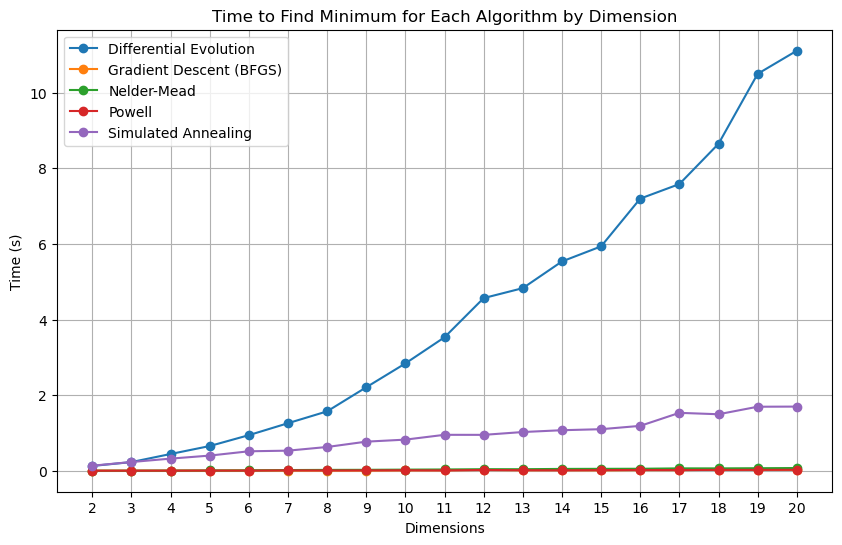

In [15]:

def plot_algorithm_times(df_pivot):
    plt.figure(figsize=(10, 6))

    for algorithm in df_pivot.index:
        plt.plot(df_pivot.columns, df_pivot.loc[algorithm], marker='o', label=algorithm)

    plt.title('Time to Find Minimum for Each Algorithm by Dimension')
    plt.xlabel('Dimensions')
    plt.ylabel('Time (s)')
    plt.xticks(df_pivot.columns)
    plt.legend()
    plt.grid(True)
    
    plt.show()

plot_algorithm_times(df_pivot)

### Usando algunas de las que se usan en las redes neuronales:

Quería usar algunas de las funciones que se utilizan para optimizar en las redes neuronales, y visualizarlas, así que probé con **Adam** y el **Stochastic Gradient Descent (SGD)**. Estas funciones juegan un papel crucial en el ajuste de los pesos de los modelos, permitiendo que aprendan a partir de los datos mediante la minimización de una función de pérdida.

#### **Adam (Adaptive Moment Estimation):**
Adam combina los mejores aspectos del **RMSProp** y el **Momentum**. Es un algoritmo de optimización basado en el gradiente, diseñado para funcionar bien en problemas de gran escala y con datos ruidosos. Funciona manteniendo dos momentos en la optimización:
- **Media móvil del gradiente** (primer momento): Para medir la tendencia promedio de las actualizaciones, lo que ayuda a suavizar la dirección del gradiente y evitar movimientos demasiado bruscos.
- **Media móvil del gradiente al cuadrado** (segundo momento): Esto mide la magnitud de las actualizaciones anteriores, lo que permite ajustar el tamaño del paso (tasa de aprendizaje) de forma adaptativa.

Adam ajusta dinámicamente las tasas de aprendizaje de cada parámetro en función de estas dos cantidades, lo que lo hace particularmente eficiente y estable. A menudo se prefiere en redes neuronales por su capacidad de manejar grandes cantidades de datos y problemas complejos, ajustando automáticamente la tasa de aprendizaje en cada paso de la optimización.

#### **Stochastic Gradient Descent (SGD):**
El **Stochastic Gradient Descent** es una versión modificada del clásico **Gradient Descent**. En lugar de calcular el gradiente basado en todo el conjunto de datos (como en el **Batch Gradient Descent**), SGD actualiza los pesos en cada paso utilizando solo una muestra o un pequeño subconjunto de datos. Esto tiene varias ventajas:
- **Velocidad**: Al actualizar los pesos con más frecuencia, converge más rápido, lo que lo hace adecuado para grandes conjuntos de datos.
- **Efecto estocástico**: Debido a que se utiliza una muestra en cada paso, las actualizaciones tienen una naturaleza más ruidosa, lo que puede ayudar al optimizador a escapar de mínimos locales y encontrar mejores soluciones globales.
  
Sin embargo, la naturaleza ruidosa de las actualizaciones también puede hacer que los movimientos sean menos predecibles y que el algoritmo tarde más en converger a una solución óptima en comparación con métodos como Adam, que ajustan la tasa de aprendizaje adaptativamente.

Ambos métodos son ampliamente utilizados en el entrenamiento de redes neuronales y, aunque Adam suele ser más robusto y eficiente en problemas complejos, **SGD** sigue siendo popular debido a su simplicidad y rendimiento en problemas más controlados.

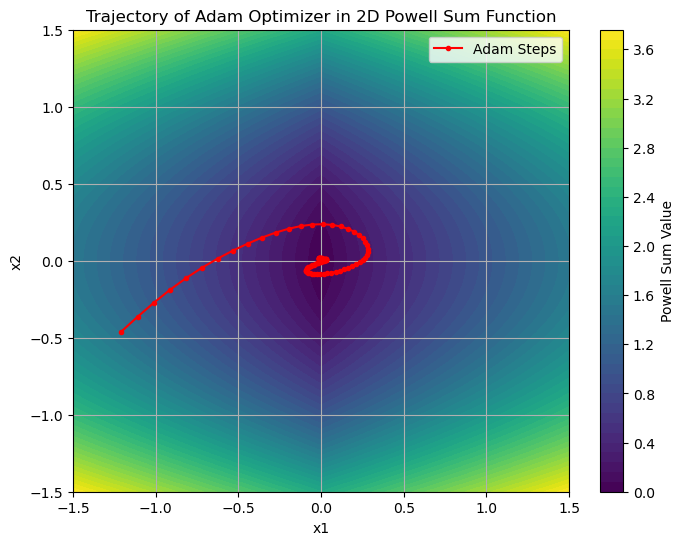

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def powell_sum(x):
    return torch.sum(torch.abs(x)**(torch.arange(1, len(x)+1, dtype=torch.float32) + 1))

def run_adam_with_tracking(dimensions, steps=1000, lr=0.1):
    x = torch.randn(dimensions, requires_grad=True)
    optimizer = optim.Adam([x], lr=lr)
    steps_taken = []
    
    for _ in range(steps):
        optimizer.zero_grad()
        loss = powell_sum(x)
        loss.backward()
        optimizer.step()
        steps_taken.append(x.detach().numpy().copy()) 
    
    return steps_taken

def plot_2d_powell_with_adam(steps_2d):
    x = np.linspace(-1.5, 1.5, 400)
    y = np.linspace(-1.5, 1.5, 400)
    X, Y = np.meshgrid(x, y)
    
    Z = np.abs(X)**1 + np.abs(Y)**2  
    plt.figure(figsize=(8, 6))
    
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Powell Sum Value')

    steps_2d = np.array(steps_2d)
    plt.plot(steps_2d[:, 0], steps_2d[:, 1], marker='o', color='red', label='Adam Steps', markersize=3)

    plt.title("Trajectory of Adam Optimizer in 2D Powell Sum Function")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_3d_powell_with_adam(steps_3d):
    x = np.linspace(-1.5, 1.5, 100)
    y = np.linspace(-1.5, 1.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.abs(X)**1 + np.abs(Y)**2  
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)
    
    steps_3d = np.array(steps_3d)
    ax.plot(steps_3d[:, 0], steps_3d[:, 1], steps_3d[:, 2], marker='o', color='red', label='Adam Steps', markersize=3)

    ax.set_title("Trajectory of Adam Optimizer in 3D Powell Sum Function")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    plt.legend()
    plt.show()

steps_2d = run_adam_with_tracking(2)
plot_2d_powell_with_adam(steps_2d)


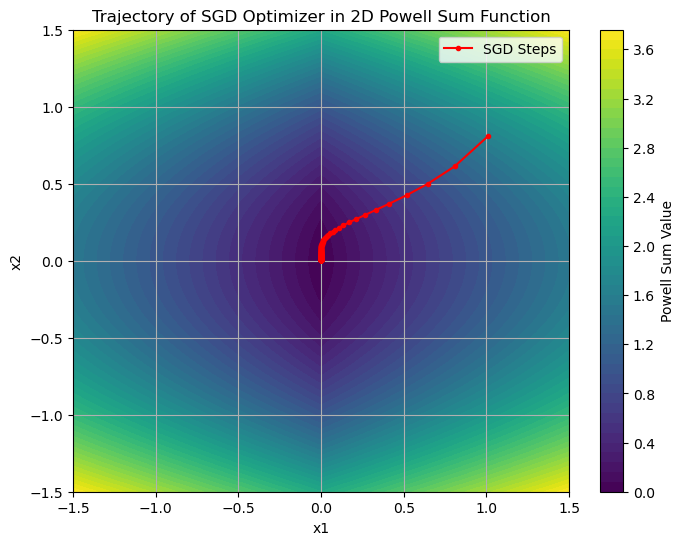

In [13]:
def run_SGD_with_tracking(dimensions, steps=1000, lr=0.1):
    x = torch.randn(dimensions, requires_grad=True)
    optimizer = optim.SGD([x], lr=lr)
    steps_taken = []
    
    for _ in range(steps):
        optimizer.zero_grad()
        loss = powell_sum(x)
        loss.backward()
        optimizer.step()
        steps_taken.append(x.detach().numpy().copy()) 
    
    return steps_taken

def plot_2d_powell_with_SGD(steps_2d):
    x = np.linspace(-1.5, 1.5, 400)
    y = np.linspace(-1.5, 1.5, 400)
    X, Y = np.meshgrid(x, y)
    
    Z = np.abs(X)**1 + np.abs(Y)**2  
    plt.figure(figsize=(8, 6))
    
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Powell Sum Value')

    steps_2d = np.array(steps_2d)
    plt.plot(steps_2d[:, 0], steps_2d[:, 1], marker='o', color='red', label='SGD Steps', markersize=3)

    plt.title("Trajectory of SGD Optimizer in 2D Powell Sum Function")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_3d_powell_with_SGD(steps_3d):
    x = np.linspace(-1.5, 1.5, 100)
    y = np.linspace(-1.5, 1.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.abs(X)**1 + np.abs(Y)**2  
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)
    
    steps_3d = np.array(steps_3d)
    ax.plot(steps_3d[:, 0], steps_3d[:, 1], steps_3d[:, 2], marker='o', color='red', label='SGD Steps', markersize=3)

    ax.set_title("Trajectory of SGD Optimizer in 3D Powell Sum Function")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    plt.legend()
    plt.show()

steps_2d = run_SGD_with_tracking(2)
plot_2d_powell_with_SGD(steps_2d)


Bueno, or ultimo un chiste:
 
A la esposa de un cientifico de datos le preguntan si ha escuchado de las personas con las que trabaja su esposo, y esta responde:

- Si, dos hombres ahi, se llaman Adam y JaSON


Nota del autor: Rianse por favor